# Insurance Data set Project


Steps and tasks:
1. Import the necessary libraries

2. Read the data as a data frame

3. Perform basic EDA which should include the following
and print out your insights at every step.

a. Shape of the data

b. Data type of each attribute

c. Checking the presence of missing values

d. 5 point summary of numerical attributes

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
columns

g. Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges columns

h. Distribution of categorical columns (include
children)

i. Pair plot that includes all the columns of the data
frame

4. Answer the following questions with statistical evidence
a. Do charges of people who smoke differ significantly from the people who don't?

b. Does bmi of males differ significantly from that of females?

c. Is the proportion of smokers significantly different in different genders?

d. Is the distribution of bmi across women with no children, one child and two children, the same ?

1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Read the data as a data frame

In [3]:
ins=pd.read_csv("insurance.csv")

3. Perform basic EDA which should include the following and print out your insights at every step.
a. Shape of the data

In [4]:
ins.shape

(1338, 7)

b. Data type of each attribute

In [6]:
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

c. Checking the presence of missing values

In [8]:
ins.isnull().sum()   #no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d. 5 point summary of numerical attributes

In [10]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

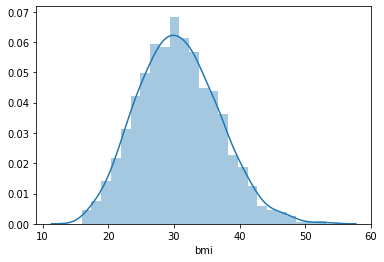

In [13]:
sns.distplot(ins['bmi'])

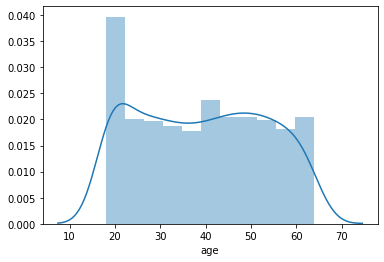

In [14]:
sns.distplot(ins['age'])

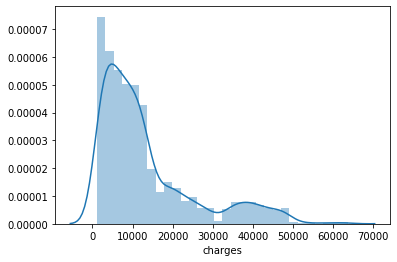

In [15]:
sns.distplot(ins['charges'])

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
columns
g. Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges columns

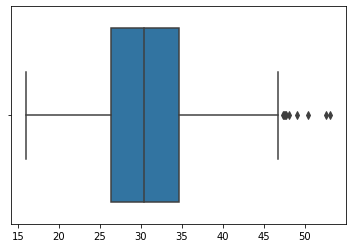

In [18]:
sns.boxplot(x=['bmi'],data=ins)   #outliers detected

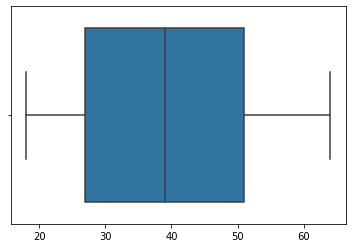

In [19]:
sns.boxplot(x=['age'],data=ins)    #no outliers

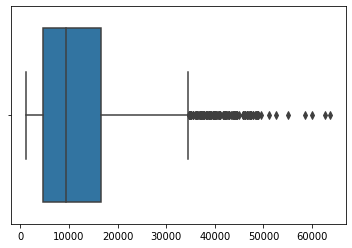

In [20]:
sns.boxplot(x=['charges'],data=ins)    # Right skewed, and outliers detected

h. Distribution of categorical columns (include children)

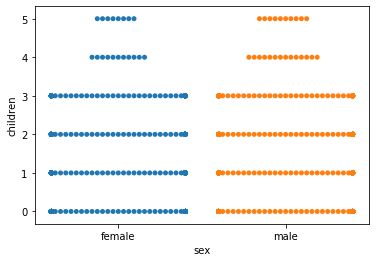

In [28]:
sns.swarmplot(x='sex',y='children',data=ins)

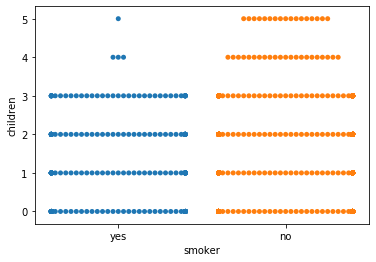

In [29]:
sns.swarmplot(x='smoker',y='children',data=ins)

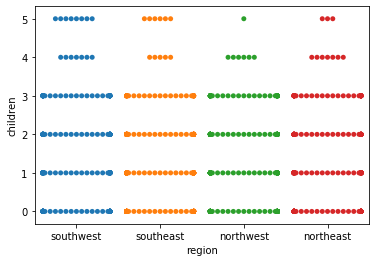

In [30]:
sns.swarmplot(x='region',y='children',data=ins)

i. Pair plot that includes all the columns of the dataframe

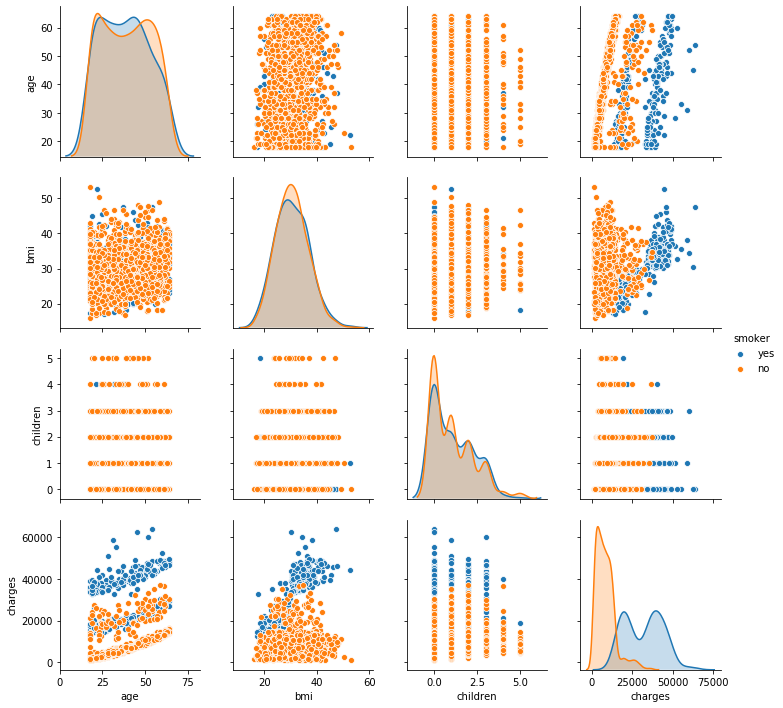

In [21]:
sns.pairplot(ins,hue='smoker')

# 4. Answer the following questions with statistical evidence

# a. Do charges of people who smoke differ significantly from the people who don't?

Null Hypothesis : There is no significant difference between charges of people who smoke and don't smoke.

Alternate Hypothesis : There is a significant difference

In [49]:
from scipy import stats 
s1=ins[ins['smoker']=='yes'].charges
s2=ins[ins['smoker']=='no'].charges
t_statistic, p_value=stats.ttest_ind(s1,s2)
print("t-statistic: ",t_statistic)
print("P value: ",p_value)

t-statistic:  46.664921172723716
P value:  8.271435842177219e-283


Since p-value is less than 5%, the statistical decision is to reject null hypothesis. Therefore,charges of people who smoke differ significantly from the people who don't.

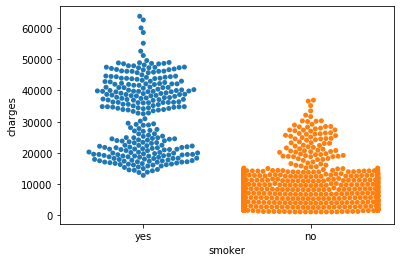

In [50]:
sns.swarmplot(x='smoker',y='charges',data=ins)    #statistical evidence

# b. Does bmi of males differ significantly from that of females?

Null Hypothesis : There is no significant difference between bmi of males and females

Alternate Hypothesis : There is a significant difference

In [51]:
s1=ins[ins['sex']=='female'].bmi
s2=ins[ins['sex']=='male'].bmi
t_statistic, p_value=stats.ttest_ind(s1,s2)
print("t-statistic: ",t_statistic)
print("P value: ",p_value)

t-statistic:  -1.696752635752224
P value:  0.08997637178984932


Since p-value is greater than 5%, the statistical decision is to accept the null hypothesis.
Thus, there is no significant difference between bmi of males and females.

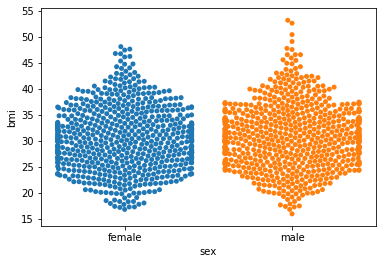

In [53]:
sns.swarmplot(x='sex',y='bmi',data=ins)    #statistical evidence

# c. Is the proportion of smokers significantly different in different genders?

Null: The the proportion of smokers not significantly different in different genders

Alternate: The proportion is significantly different.

In [56]:
female_smokers = ins[ins['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = ins[ins['sex'] == 'male'].smoker.value_counts()[1]# number of male smokers
n_females = ins.sex.value_counts()[1] # number of females in the data
n_males = ins.sex.value_counts()[0] #number of males in the data

In [61]:
print([female_smokers, male_smokers] , [n_females, n_males])   #provides evidence that proportion is significantly differnt
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [60]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
print("p-value: ",pval)


p-value:  0.005324114164320532


Since p-value is lesser than 5%, the statistical decision is to reject null hypothesis.
Therefore, the proportion of smokers is significantly different in different genders

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

Null: Distribution of bmi across women with no children, one child and two children has no significant difference.
    
Alternate: Distribution of bmi is significantly different

In [64]:
import pandas as pd
mean_df = pd.DataFrame()

s1            = ins[ins['children']==0].bmi
s2            = ins[ins['children']==1].bmi
s3            = ins[ins['children']==2].bmi

df1            = pd.DataFrame({'children': '0', 'bmi':s1})
df2            = pd.DataFrame({'children': '1', 'bmi':s2})
df3            = pd.DataFrame({'children': '2', 'bmi':s3})

mean_df = mean_df.append(df1) 
mean_df = mean_df.append(df2) 
mean_df = mean_df.append(df3) 

In [65]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = mean_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
children     31.631915     2.0  0.416983  0.659133
Residual  43049.991501  1135.0       NaN       NaN


In this example, p value is 0.659133 and it is more than our chosen level of signifance at 5% So the statistical decision is to accept the null hypothesis at 5% level of significance. 

Therefore, there is no significant difference in distribution of bmi across women with no children, one child and two children.